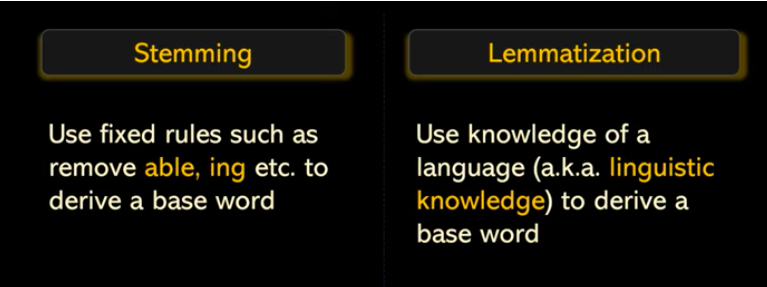

- spacy don't support stemming whereas nltk supports both stemming and lemmitization

#Stemming in NLTK

In [ ]:
import nltk
import spacy

In [ ]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [ ]:
# Printing word and it's base word

words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]
for word in words:
  print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


#Lemmatization in Spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc=nlp("eating eats eat ate adjustable rafting ability meeting better")

for token in doc:
  print(token,"|",token.lemma_,"|",token.lemma)


eating | eat | 9837207709914848172
eats | eat | 9837207709914848172
eat | eat | 9837207709914848172
ate | eat | 9837207709914848172
adjustable | adjustable | 6033511944150694480
rafting | raft | 7154368781129989833
ability | ability | 11565809527369121409
meeting | meeting | 14798207169164081740
better | well | 4525988469032889948


#Customizing lemmatizer

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc=nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
  print(token.text,"|",token.lemma_)

Bro | bro
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brah
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


- In the above example we know that Bro and brah are same which means "brother"
- So we are goin to customize the lemmatization

In [ ]:
# Taking attribute ruler componenet from pipeline
ar= nlp.get_pipe("attribute_ruler")

ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})
doc= nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
  print(token.text,"|",token.lemma_)

Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


# Stemming and Lemmatization Exercise

In [ ]:
#let import necessary libraries and create the object

#for nltk
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#downloading all neccessary packages related to nltk
nltk.download('all')


#for spacy
import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Exercise1:

- Convert these list of words into base form using Stemming and Lemmatization and observe the transformations

- Write a short note on the words that have different base words using stemming and Lemmatization

In [ ]:
#using stemming in nltk
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']

for word in lst_words:
    print(f"{word} | {stemmer.stem(word)}")

running | run
painting | paint
walking | walk
dressing | dress
likely | like
children | children
whom | whom
good | good
ate | ate
fishing | fish


In [ ]:
#using lemmatization in spacy

doc = nlp("running painting walking dressing likely children whom good ate fishing")
for token in doc:
    print(token, " | ", token.lemma_)

running  |  run
painting  |  paint
walking  |  walk
dressing  |  dress
likely  |  likely
children  |  child
whom  |  whom
good  |  good
ate  |  eat
fishing  |  fishing


#Observations

Words that are different in stemming and lemmatization are:

- painting
- likely
- children
- ate
- fishing

As Stemming achieves the base word by removing the suffixes [ing, ly etc], so it successfully transform the words like 'painting', 'likely', 'fishing' and lemmatization fails for some words ending with suffixes here.

As Lemmatization uses the dictionary meanings while converting to the base form, so words like 'children' and 'ate' are successfully transformed and stemming fails here.

#Exercise2:

convert the given text into it's base form using both stemming and lemmatization

In [ ]:
text = """Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
"""

In [ ]:
#using stemming in nltk

#step1: Word tokenizing

all_word_tokens=nltk.word_tokenize(text)

#step2: getting the base form for each token using stemmer
all_base_words = []

for token in all_word_tokens:
  base_form=stemmer.stem(token)
  all_base_words.append(base_form)

final_base_text=" ".join(all_base_words)
print(final_base_text)

latha is veri multi talent girl.sh is good at mani skill like danc , run , sing , playing.sh also like eat pav bhagi . she ha a habit of fish and swim too.besid all thi , she is a wonder at cook too .


In [ ]:
#using lemmatisation in spacy


#step1: Creating the object for the given text

doc=nlp(text)
all_base_words=[]

#step2: getting the base form for each token using spacy 'lemma_'

for token in doc:
  base_word=token.lemma_
  all_base_words.append(base_word)

final_base_words= " ".join(all_base_words)
print(final_base_words)

Latha be very multi talented girl . she be good at many skill like dancing , running , singing , play . she also like eat Pav Bhagi . she have a 
 habit of fishing and swim too . besides all this , she be a wonderful at cook too . 

